In [1]:
import os
import sys
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Get the absolute path of the notebook's directory
notebook_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(notebook_dir)

from src.app import PermutationSolver

In [8]:
3600000*0.1

360000.0

In [2]:
n = 10
config = {
            'n_permutations_length': n,
            
            # Random walks params
            'random_walks_type': 'non-backtracking-beam',
            'n_random_walk_length': int(n * (n-1) / 2),
            'n_random_walks_to_generate': 1000,
            'n_random_walks_steps_back_to_ban': 8,
            
            # Neural Net params
            'model_type': 'MLP',
            'list_layers_sizes': [256, 256, 256],
            'n_epochs': 1000,
            'batch_size': 2**10,
            'lr_supervised': 1e-3,
            
            # DQN training
            'n_epochs_dqn': 5000,
            'flag_dqn_round': False,
            'n_random_walks_to_generate_dqn': 10000,
            'verbose_loc': 50,
            'lr_rl': 1e-3,
            
            # Beam search
            'beam_search_torch': True,
            'beam_search_Fironov': False,
            'beam_width': 1,
            'n_steps_limit': 4 * n**2,
            'alpha_previous_cost_accumulation': 0,
            'beam_search_models_or_heuristics': 'model_torch',
            'ban_p0_p1_transposition_if_p0_lt_p1_ie_already_sorted': False,
            'n_beam_search_steps_back_to_ban': 32,
            
            # What to solve
            'solve_random_or_longest_state': 'solve_LRX_longest',
            'verbose': 100
        }


In [3]:
solver = PermutationSolver(config)

In [4]:
mlp_losses = solver.train_mlp(mode = 'anchor')

3628800
X.shape: torch.Size([3628800, 10])
y.shape: torch.Size([3628800])
Training MLP with anchor


Training MLP with anchor: 100%|██████████| 1000/1000 [26:36<00:00,  1.60s/it, test_loss=0.0241, train_loss=0.0084]


In [5]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")

Number of trainable parameters in solver.mlp_model: 136961


In [5]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")

Number of trainable parameters in solver.mlp_model: 536065


In [5]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")

Number of trainable parameters in solver.mlp_model: 2203649


In [5]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")

Number of trainable parameters in solver.mlp_model: 2120705


In [5]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")

Number of trainable parameters in solver.mlp_model: 2120705


In [28]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")

Number of trainable parameters in solver.mlp_model: 1071105


In [24]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")

Number of trainable parameters in solver.mlp_model: 273409


In [5]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")

Number of trainable parameters in solver.mlp_model: 70401


In [18]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")

Number of trainable parameters in solver.mlp_model: 628737


In [9]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")

Number of trainable parameters in solver.mlp_model: 33793


In [5]:
num_params = sum(p.numel() for p in solver.mlp_model.parameters() if p.requires_grad)
print(f"Number of trainable parameters in solver.mlp_model: {num_params}")


Number of trainable parameters in solver.mlp_model: 33153


In [5]:
solver.X_anchor.shape

torch.Size([40320, 4, 8])

In [7]:
solver.y_anchor.shape

torch.Size([1000001, 4])

In [12]:
X=solver.X_anchor
y=solver.y_anchor
y_train = y.float()
indices = torch.randperm(X.shape[0], dtype=torch.int64, device='cpu')  # Generate indices on CPU
X_train = X[indices]
y_train = y_train[indices]
X_train = X

B, four, state_size = X_train.shape
batch_x = X_train.reshape(B * four, state_size)
batch_y = y_train.reshape(B * four)

In [13]:
batch_x

tensor([[0, 1, 2,  ..., 7, 8, 9],
        [1, 2, 3,  ..., 8, 9, 0],
        [9, 0, 1,  ..., 6, 7, 8],
        ...,
        [2, 6, 0,  ..., 1, 7, 8],
        [7, 8, 2,  ..., 3, 5, 1],
        [2, 8, 6,  ..., 5, 1, 7]], device='cuda:0')

In [15]:
batch_y

tensor([21., 20., 20.,  ..., 23., 21., 21.], device='cuda:0')

In [8]:
factorial_11 = 1
for i in range(1, 12):
    factorial_11 *= i
factorial_11


39916800

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_anchor)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_anchor[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

y_anchor = solver.y_anchor

diff = y_anchor.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })
summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-1.720894,1.897514,0.051909,0.07641,40,201,0.000664


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_test)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_test[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

diff = solver.y_test.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })
summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-4.169704,4.245262,0.051945,0.146188,22048,32557,0.01672


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_anchor)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_anchor[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

y_anchor = solver.y_anchor

diff = y_anchor.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })
summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-1.888,1.262718,0.074194,0.063389,114,361,0.000436


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_test)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_test[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

diff = solver.y_test.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })
summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-3.203079,4.290516,0.074136,0.079702,2660,4140,0.002677


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_anchor)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_anchor[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

y_anchor = solver.y_anchor

diff = y_anchor.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })
summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-0.841547,0.87196,-0.029881,0.035947,7,13,0.000018


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_test)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_test[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

diff = solver.y_test.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })
summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-4.649337,2.794109,-0.029911,0.054246,1563,1407,0.001169


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_anchor)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_anchor[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

y_anchor = solver.y_anchor

diff = y_anchor.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })
summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-2.043777,2.004091,-0.023025,0.041103,434,138,0.000525


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_test)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_test[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

diff = solver.y_test.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })
summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-4.9679,3.330042,-0.023106,0.080786,3903,2519,0.002528


In [ ]:
0.000007
0.000943

0.000525
0.002528

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_anchor)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_anchor[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

y_anchor = solver.y_anchor

diff = y_anchor.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })
summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-0.789593,0.632099,-0.024288,0.035715,4,4,0.000007


In [ ]:
0.000007
0.000943


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_test)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_test[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

diff = solver.y_test.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })
summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-3.598852,2.873283,-0.024371,0.051507,1348,1047,0.000943


In [6]:
# calculate min and max of difference between solver.y_anchor and y_valid
# y_valid = solver.dqn_model(solver.X_anchor)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_anchor)
with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_anchor[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

y_anchor = solver.y_anchor

diff = y_anchor.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })

summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-0.819647,0.645447,0.009132,0.029704,4,3,0.000007


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
solver.X_anchor, solver.y_anchor = solver.generate_training_data_anchor(num_of_samples=5_000_000, mode='single')
n_samples = len(solver.X_anchor)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_anchor[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

y_anchor = solver.y_anchor

diff = y_anchor.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })

summary_df_cur

3628800
X.shape: torch.Size([3628800, 10])
y.shape: torch.Size([3628800])


,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-2.118607,8.181068,0.971502,1.335526,3769,1575251,0.435136


In [29]:
# calculate min and max of difference between solver.y_anchor and y_valid
# y_valid = solver.dqn_model(solver.X_anchor)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_anchor)
with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_anchor[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

y_anchor = solver.y_anchor

diff = y_anchor.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })

summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-2.092207,1.836468,0.066793,0.22419,8567,31616,0.040183


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
solver.X_anchor, solver.y_anchor = solver.generate_training_data_anchor(num_of_samples=5_000_000, mode='single')
n_samples = len(solver.X_anchor)

with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_anchor[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

y_anchor = solver.y_anchor

diff = y_anchor.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })

summary_df_cur

3628800
X.shape: torch.Size([3628800, 10])
y.shape: torch.Size([3628800])


,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-2.397642,5.544376,0.626675,0.758084,36367,1636018,0.460864


In [ ]:
0.001488
0.002455
0.001265

In [20]:
solver.y_anchor.reshape(B * four).shape

torch.Size([4000004])

In [7]:
dqn_losses = solver.train_dqn()

1000000
X.shape: torch.Size([1000000, 12])
y.shape: torch.Size([1000000])
Starting DQN training for 5000 epochs...


Training MLP with random walks:   1%|          | 55/5000 [02:23<3:34:47,  2.61s/it, loss=0.0979, hinge: 0.0676, anchor: 0.0289]


KeyboardInterrupt: 

In [26]:
# calculate min and max of difference between solver.y_anchor and y_valid
# y_valid = solver.dqn_model(solver.X_anchor)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
solver.mlp_trainer.model.eval()               # set to eval mode
y_parts = []
n_samples = len(solver.X_anchor)
with torch.no_grad():                 # <— no grad tracking
    for start in range(0, n_samples, 1024):
        end = start + 1024
        X_batch = solver.X_anchor[start:end].to(device)
        y_batch = solver.mlp_trainer.model(X_batch)
        y_parts.append(y_batch.cpu()) # move back to CPU
        # explicitly free GPU memory
        del X_batch, y_batch
        torch.cuda.empty_cache()

y_valid = torch.cat(y_parts, dim=0)

diff = solver.y_anchor.cpu().detach().numpy() - y_valid.cpu().detach().numpy().reshape(1, -1)[0]
min_diff = diff.min()
max_diff = diff.max()
std_diff = diff.std()
mean_diff = diff.mean()
num_elements_less_than_minus_05 = (diff < -0.5).sum()
num_elements_larger_than_05 = (diff > 0.5).sum()
wrong_predictions = num_elements_less_than_minus_05 + num_elements_larger_than_05
percentage_wrong_predictions = wrong_predictions / len(diff)

# save summary_df
summary_df_cur = pd.DataFrame({
                                'min_diff': [min_diff],
                                'max_diff': [max_diff],
                                'mean_diff': [mean_diff],
                                'std_diff': [std_diff],
                                'num_elements_less_than_minus_05': [num_elements_less_than_minus_05],
                                'num_elements_larger_than_05': [num_elements_larger_than_05],
                                'percentage_wrong_predictions': [percentage_wrong_predictions]
                                })

summary_df_cur

,min_diff,max_diff,mean_diff,std_diff,num_elements_less_than_minus_05,num_elements_larger_than_05,percentage_wrong_predictions
0,-1.187559,1.147144,-0.033859,0.15859,3428,1409,0.004837


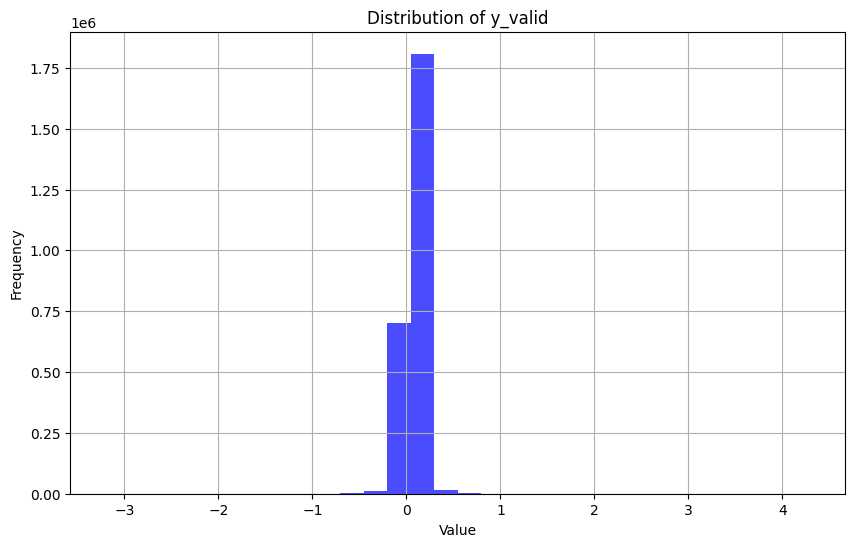

In [14]:
import matplotlib.pyplot as plt

# Plot distribution of the torch vector y_valid
plt.figure(figsize=(10, 6))
plt.hist(diff, bins=30, alpha=0.7, color='blue')
plt.title('Distribution of y_valid')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()